In [1]:
%matplotlib widget

In [2]:
import numpy as np
import pygimli as pg
import empymod as ep
from scipy.constants import mu_0
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import root_mean_squared_error
import pandas as pd
import sys
sys.path.insert(1, '../src')

from FDEM1D import FDEM1DModelling, LCModelling
from showStitched import showStitchedModels
from Plots import Plot2Datas, grid

In [3]:
# First step: check configuration of FDEM to perform forward
# Second step: check number of layers in FDEM1D Modelling forward class

In [4]:
models = np.load('models/model_slope5.npy')
data = np.load('data/data3D_slope5_sorted.npy', allow_pickle=True)
data = np.array(data)

<Axes: title={'center': 'True Model'}>

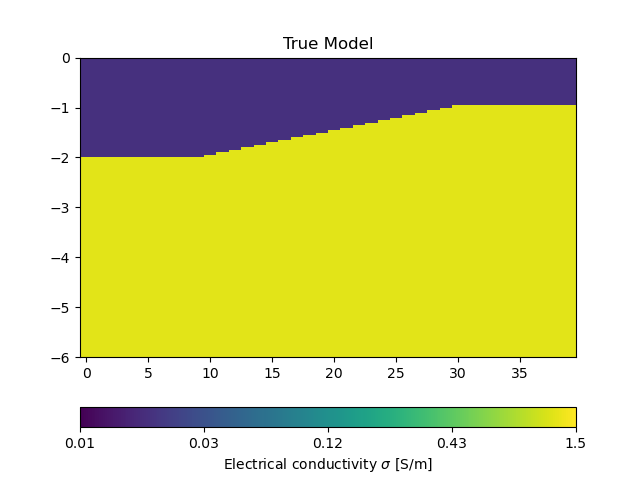

In [79]:
inputs ={'label' : 'Electrical conductivity $\sigma$ [S/m]',
         'cMin': 10/1000,
         'cMax': 1500/1000}

showStitchedModels(models, zMax=6, title = 'True Model', **inputs)

In [80]:
data_t = data.copy()

In [81]:
nLayers = np.shape(models)[1] -1
nLayers

2

# Inversion

In [82]:
# Initial model
m0 = models.copy()

# 2 lay case
m0[:,:1] = 2
m0[:,1:] = 500/1000

m0 = m0.ravel()

### L-curve criterion

In [83]:
lambdas = np.logspace(-1,2,30, endpoint=False)
lambdas

array([ 0.1       ,  0.12589254,  0.15848932,  0.19952623,  0.25118864,
        0.31622777,  0.39810717,  0.50118723,  0.63095734,  0.79432823,
        1.        ,  1.25892541,  1.58489319,  1.99526231,  2.51188643,
        3.16227766,  3.98107171,  5.01187234,  6.30957344,  7.94328235,
       10.        , 12.58925412, 15.84893192, 19.95262315, 25.11886432,
       31.6227766 , 39.81071706, 50.11872336, 63.09573445, 79.43282347])

RUNNING L CURVE CRITERION 
Now using LAMBDA 0.1 - 0 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:30:45 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:30:46 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd543997380>
Now using LAMBDA 0.14384498882876628 - 1 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:30:49 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:30:49 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd547359bc0>
Now using LAMBDA 0.20691380811147897 - 2 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:30:53 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:30:53 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd54231dda0>
Now using LAMBDA 0.29763514416313175 - 3 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:30:56 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:30:56 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd549509bc0>
Now using LAMBDA 0.42813323987193935 - 4 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:00 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:00 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd542d27e70>
Now using LAMBDA 0.6158482110660264 - 5 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:03 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:03 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd5484dcf90>
Now using LAMBDA 0.8858667904100825 - 6 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:06 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:07 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd54231cc20>
Now using LAMBDA 1.2742749857031335 - 7 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:10 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:11 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd542541bc0>
Now using LAMBDA 1.8329807108324356 - 8 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:15 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:15 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd542d272e0>
Now using LAMBDA 2.636650898730358 - 9 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:19 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:19 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd542d24130>
Now using LAMBDA 3.79269019073225 - 10 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:23 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:24 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd54735a4d0>
Now using LAMBDA 5.455594781168517 - 11 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:27 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:28 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd547359bc0>
Now using LAMBDA 7.847599703514611 - 12 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:31 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:31 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd549b4cb30>
Now using LAMBDA 11.288378916846883 - 13 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:34 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:34 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd542e06a70>
Now using LAMBDA 16.23776739188721 - 14 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:41 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:41 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd542d27830>
Now using LAMBDA 23.357214690901213 - 15 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:44 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:44 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd542d240e0>
Now using LAMBDA 33.59818286283781 - 16 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:51 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:51 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd547303e70>
Now using LAMBDA 48.32930238571752 - 17 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:55 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:55 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd54266b1f0>
Now using LAMBDA 69.51927961775606 - 18 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:31:58 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:31:58 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd547359bc0>
Now using LAMBDA 100.0 - 19 ITERATION 
Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:32:05 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:32:05 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd542e05ad0>
Elapsed time is 1 minute and 22.22 seconds.
The optimal alpha =  23.357214690901213


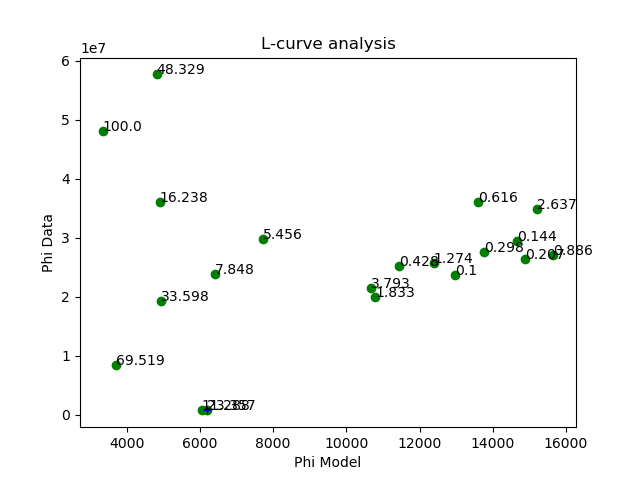

In [108]:
Lcurve = True

if Lcurve:
    # ertmanager.inv.phiModel() #x
    # ertmanager.inv.phiData() #y 
    #do it with the inverse of lambda? 
    print('RUNNING L CURVE CRITERION ')
    lambdas = np.logspace(-1,2,20)
        
    phimodels = []
    phidatas = []
    chis = []
    mods = {}

    pg.tic()
    for i, a in enumerate(lambdas):
        print(f'Now using LAMBDA {a} - {i} ITERATION ')
        LC = LCModelling(FDEM1DModelling)
        LC.initJacobian(dataVals=data_t, nLay=nLayers)
        LC.createJacobian(models)
        LC.constraint_matrix(data_t, nLay=nLayers)
        LC.normalization(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
        LC.createWeight(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
        LC.createConstraints()
        
        transData = pg.trans.TransLog()
        transThk = pg.trans.TransLogLU(0.1,3)
        transSig = pg.trans.TransLogLU(10/1000,1500/1000)

        LC.region(1).setTransModel(transThk)
        LC.region(2).setTransModel(transSig)

        data_true = np.array(data_t).ravel()
        relativeError = np.ones_like(data_true)*1e-3 # what is this for?

        inv = pg.Inversion(LC)
        inv.dataTrans = transData
        mod = inv.run(data_true, relativeError, startModel=m0, verbose=False, lam=a)
        phimodels.append(inv.phiModel())
        phidatas.append(inv.phiData())
        chis.append(inv.chi2())
        mods[a] = mod
    pg.toc()

    #first derivatives 
    dx= np.gradient(phimodels)
    dy = np.gradient(phidatas)

    #second derivatives 
    d2x = np.gradient(dx)
    d2y = np.gradient(dy)

    #calculation of curvature from the typical formula
    curvature = np.abs(dx * d2y - d2x * dy) / (dx * dx + dy * dy)**1.5
    print("The optimal alpha = ", lambdas[np.argmax(curvature)+1])

    plt.figure()
    plt.scatter(phimodels, phidatas, c='g')
    plt.xlabel('Phi Model')
    plt.ylabel('Phi Data')
    plt.title('L-curve analysis')
    for i, txt in enumerate(lambdas):
         txt = np.round(txt, 3)
         txt = str(txt)
         plt.annotate(txt, (phimodels[i], phidatas[i]))
    plt.plot(phimodels[np.argmax(curvature)+1], phidatas[np.argmax(curvature)+1], '+b')
    #plt.savefig(PATHPLOTS + 'Lcurveplot.jpg')
    plt.show()

    lamb_opt = lambdas[np.argmax(curvature)+1]

In [109]:
lamb_opt = lambdas[np.argmax(curvature)+1]

In [110]:
LC = LCModelling(FDEM1DModelling)
LC.initJacobian(dataVals=data_t, nLay=nLayers)
LC.createJacobian(models)
LC.constraint_matrix(data_t, nLay=nLayers)
LC.normalization(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createWeight(data_t, cWeight_1=1, cWeight_2=1, nLay=nLayers)
LC.createConstraints()

transData = pg.trans.TransLog()
transThk = pg.trans.TransLogLU(0.1,3)
transSig = pg.trans.TransLogLU(10/1000,1500/1000)

LC.region(1).setTransModel(transThk)
LC.region(2).setTransModel(transSig)

data_true = np.array(data_t).ravel()
relativeError = np.ones_like(data_true)*1e-3 # what is this for?

inv = pg.Inversion(LC)
inv.dataTrans = transData
models_est = inv.run(data_true, relativeError, startModel=m0, verbose=False, lam=lamb_opt)

Inversion is normalized
Jacobian size: 702 117 720


21/04/24 - 11:32:08 - Core - WARNING - no clear() implemented for:  18MatrixBase_wrapper
21/04/24 - 11:32:08 - Core - ERROR - no cWeights defined. You should create constraints matrix first.


cWeights are equal
Constraint cWeight length: 117
CW:  <pygimli.math.matrix.MultLeftMatrix object at 0x7fd54240a6b0>


In [111]:
models_est = np.array(models_est).reshape(np.shape(models))

models_grid = grid(models)
models_est_grid = grid(models_est)
diff = 100*np.abs(models_grid - models_est_grid)/models_grid

In [197]:
pos = len(models)
x =  np.linspace(0,pos,pos, endpoint=False)
boundary = np.array([x, -models_est[:,0]]).T

np.save('models/boundary_est', boundary)

<Axes: title={'center': 'True Model LCI'}>

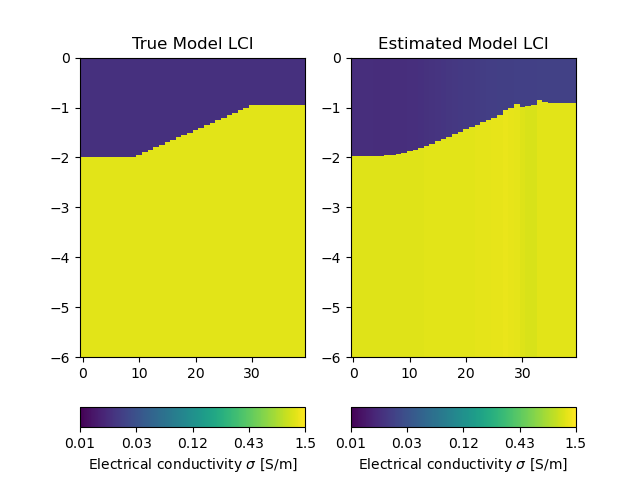

In [112]:
fig, ax = plt.subplots(1,2)

inputs ={'label' : 'Electrical conductivity $\sigma$ [S/m]',
         'cMin': 10/1000,
         'cMax': 1500/1000, 
         'logScale':True, 
         'location':'right'}

showStitchedModels(ax = ax[1], models=models_est, zMax=6, 
                  title = 'Estimated Model LCI', **inputs)

showStitchedModels(ax = ax[0], models=models, zMax=6, 
                  title = 'True Model LCI', **inputs)

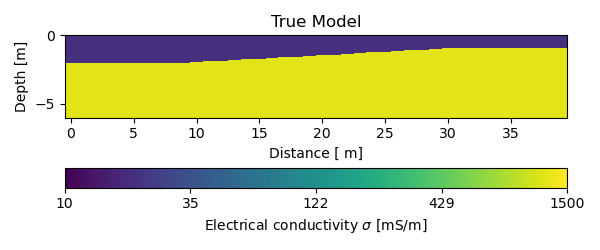

In [183]:
fig, ax = plt.subplots(figsize=(6,2.5))

models_mS = models.copy()
models_mS[:,1:] = models_mS[:,1:]*1000

inputs ={'label' : 'Electrical conductivity $\sigma$ [mS/m]',
         'cMin': 10,
         'cMax': 1500, 
         'logScale':True, 
         'location':'right'}

showStitchedModels(ax = ax, models=models_mS, zMax=6, 
                  title = 'True Model', **inputs)

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Distance [ m]')

plt.tight_layout()

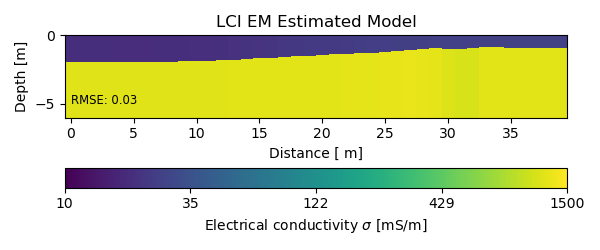

In [184]:
fig, ax = plt.subplots(figsize=(6,2.5))

models_mS = models_est.copy()
models_mS[:,1:] = models_mS[:,1:]*1000

inputs ={'label' : 'Electrical conductivity $\sigma$ [mS/m]',
         'cMin': 10,
         'cMax': 1500, 
         'logScale':True, 
         'location':'right'}

showStitchedModels(ax = ax, models=models_mS, zMax=6, 
                  title = 'LCI EM Estimated Model', **inputs)

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Distance [ m]')

rmse = root_mean_squared_error(models.ravel(), models_est.ravel())

ax.text(0, -5, 'RMSE: ' + "{:1.2f}".format(rmse), fontsize='small')

plt.tight_layout()

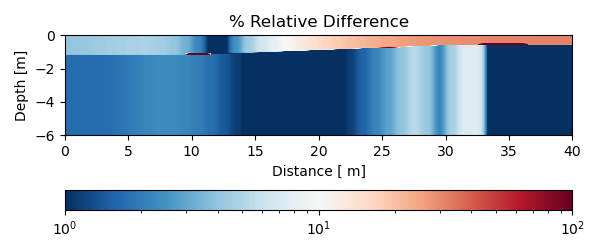

In [194]:
fig, ax = plt.subplots(figsize=(6,2.5))

c = ax.imshow(diff.T, extent=[0,40, -6,0], norm=colors.LogNorm(vmin=1, vmax=100), 
             cmap = 'RdBu_r', aspect='auto')
fig.colorbar(c, ax=ax, location='bottom', aspect=25,pad=0.3)
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Distance [ m]')
plt.title('% Relative Difference')
plt.tight_layout()
plt.show()

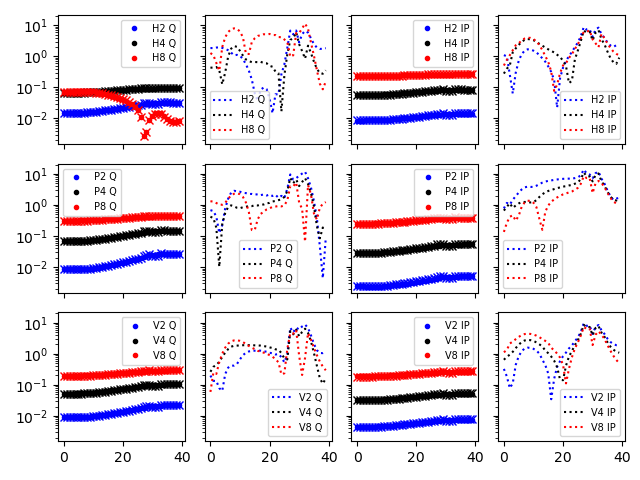

In [147]:
# True data vs Inverted data

data_inv = np.array(inv.response)
data_inv = data_inv.reshape(np.shape(data_t))

Plot2Datas(data_t, data_inv)

In [155]:
inv.response

720 [0.015217163394280616,...,0.270174565491204]

In [156]:
root_mean_squared_error(data_true, inv.response)

0.004609715478784756

In [157]:
root_mean_squared_error(models.ravel(), models_est.ravel())

0.030917924357927926